# Neural Network

In [43]:
import numpy as np
import keras
from keras import layers

Load dataset

In [44]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_trainn), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_trainn, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Visualize dataset

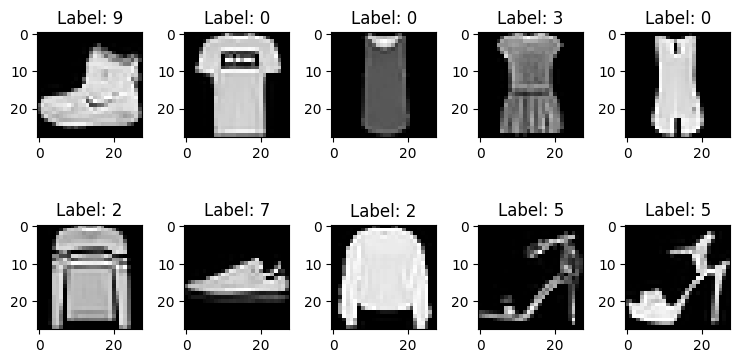

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
num_row = 2
num_col = 5
num = 10
images = x_train[:num]
labels = y_trainn[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

Build model and train

In [46]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import BinaryCrossentropy
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten the input images
    Dense(units=25, activation='sigmoid'),
    Dense(units=15, activation='sigmoid'),
    Dense(units=num_classes, activation='softmax')  # Output layer with num_classes units and softmax activation
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 25)                  │          19,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(loss=BinaryCrossentropy,metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2996 - loss: 0.3435
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6919 - loss: 0.1559
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7934 - loss: 0.1068
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8087 - loss: 0.0915
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8391 - loss: 0.0813
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8483 - loss: 0.0772
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8582 - loss: 0.0719
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8657 - loss: 0.0688
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8692 - loss: 0.0671
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8721 - loss: 0.0648
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8752 - loss: 0.0636
Epoch 12/20
1875/1875 ━━━━━━

Test model

In [48]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06874119490385056
Test accuracy: 0.8621000051498413


# CNN

In [21]:
from tensorflow.keras import  models

In [24]:
modelCNN = models.Sequential()
modelCNN.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
modelCNN.add(layers.MaxPooling2D((2, 2)))
modelCNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelCNN.add(layers.MaxPooling2D((2, 2)))
modelCNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelCNN.add(layers.Flatten())
modelCNN.add(layers.Dense(64, activation='relu'))
modelCNN.add(layers.Dense(num_classes, activation='softmax'))

modelCNN.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
modelCNN.compile(loss=BinaryCrossentropy,metrics=['accuracy'])
modelCNN.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.6811 - loss: 0.1507
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.8647 - loss: 0.0669
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.8920 - loss: 0.0539
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - accuracy: 0.9048 - loss: 0.0475
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9128 - loss: 0.0434
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9202 - loss: 0.0400
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 35ms/step - accuracy: 0.9287 - loss: 0.0363
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 30ms/step - accuracy: 0.9319 - loss: 0.0342
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.9353 - loss: 0.0334
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9418 - loss: 0.0308
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9438 - loss: 0.0291
Epoch 12

In [26]:
scoreCNN = modelCNN.evaluate(x_test, y_test, verbose=0)
print("Test loss:", scoreCNN[0])
print("Test accuracy:", scoreCNN[1])

Test loss: 0.08537115156650543
Test accuracy: 0.902999997138977


# Transfer learning

In [40]:
def build_model():
    base_model = tf.keras.applications.MobileNetV2(input_shape=(32,32, 3),
                                                   include_top=False,
                                                   weights='imagenet')

    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(32, 32, 1)),
         tf.keras.layers.Conv2D(3, (3, 3), padding='same'),  # Convert to 3 channels
        tf.keras.layers.Resizing(height=32, width=32),
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
    model.summary()
    return model, base_model

Tmodel, Tbase_model = build_model()

<ipython-input-40-1e78c3fc3625>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(32,32, 3),


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 3)           │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing_3 (Resizing)                │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1, 1, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,621,672 (10.00 MB)

 Trainable params: 362,920 (1.38 MB)

 Non-trainable params: 2,258,752 (8.62 MB)

In [42]:
Tmodel.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 216s 115ms/step - accuracy: 0.6643 - loss: 0.9365
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 264s 117ms/step - accuracy: 0.7035 - loss: 0.8278
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 259s 115ms/step - accuracy: 0.7215 - loss: 0.7721
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 116ms/step - accuracy: 0.7282 - loss: 0.7475
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 264s 117ms/step - accuracy: 0.7362 - loss: 0.7323
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 263s 117ms/step - accuracy: 0.7433 - loss: 0.7101
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 260s 116ms/step - accuracy: 0.7474 - loss: 0.6957
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 226s 121ms/step - accuracy: 0.7524 - loss: 0.6887
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 258s 119ms/step - accuracy: 0.7525 - loss: 0.6835
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 255s 115ms/step - accuracy: 0.7594 - loss: 0.6669


In [49]:
scoreTmodel = Tmodel.evaluate(x_test, y_test, verbose=0)
print("Test loss:", scoreTmodel[0])
print("Test accuracy:", scoreTmodel[1])

Test loss: 0.6838988661766052
Test accuracy: 0.7502999901771545
